# Analyzing dummy results

In [1]:
PATH = "/home/tjaros/csidh-setup/" # CHANGE THIS

In [2]:
import pandas as pd
APPROX_TOTAL_EXECUTION_TIME =  1178027

APPROX_EXECUTION_TIME = pd.DataFrame({
        "degree": [3, -5, 7, 3, -5, 7, -5, 3, 7, 3, -5, 7, 3, -5, 7],
        "setup_start": [0, 82034, 133063, 169116, 294283, 345482, 381485, 542726, 689691, 755962, 880624, 933569, 969524, 1070086, 1122983],
        "isogeny_start": [66929, 111962, 155177, 279034, 324445, 367158, 521621, 674420, 741649, 865413, 910630, 955141, 1054981, 1100186, 1144895],
        "isogeny_end": [82033, 133062, 169115, 294282, 345481, 381484, 542725, 689690, 755961, 880623, 933568, 969523, 1070085, 1122982, 1159199]

    })

HUSKY_DUMMY_SINGLE_GLITCH_MEASUREMENTS_CORRELATION = [
    "notebooks/data/dummy-results/husky/husky-(0,0,0)-random-dummy-isogeny-single-glitches-dc754a5.json",
    "notebooks/data/dummy-results/husky/husky-(5,0,0)-random-dummy-isogeny-single-glitches-dc754a5.json",
    "notebooks/data/dummy-results/husky/husky-(5,-5,0)-random-dummy-isogeny-single-glitches-dc754a5.json",
    "notebooks/data/dummy-results/husky/husky-(5,-5,5)-random-dummy-isogeny-single-glitches-dc754a5.json"
]
HUSKY_DUMMY_SINGLE_GLITCH_MEASUREMENTS = [
    "notebooks/data/dummy-results/husky/husky-(5, -3, 1)-random-dummy-isogeny-single-glitches-18a8153-0.json",
    "notebooks/data/dummy-results/husky/husky-(5, -3, 1)-random-dummy-isogeny-single-glitches-18a8153-1.json",
    "notebooks/data/dummy-results/husky/husky-(5, -3, 1)-random-dummy-isogeny-single-glitches-18a8153-2.json",
]
HUSKY_DUMMY_DOUBLE_GLITCH_MEASUREMENTS = [
    "notebooks/data/dummy-results/husky/husky-clock-dummy-3-isogeny-double-glitches-success-rate.json",
    "notebooks/data/dummy-results/husky/husky-clock-dummy-5-isogeny-double-glitches-success-rate.json"
]

DUMMY_ISOGENY_NEIGHBOURS= {
    0:   ("($+$)$3$",3), 
    261: ("($++$) $3$",3**2), 
    410: ("($-$) $3$",-3),
    368: ("($--$) $3$",-3**2),
    
    295: ("($+$) $5$",5),
    404: ("($++$) $5$",5**2),
    390: ("($-$) $5$", -5),
    9:   ("($--$) $5$",-5**2),
    
    15:  ("($+$) $7$",7),
    6:   ("($++$) $7$",7**2),
    144: ("($-$) $7$",-7),
    124: ("($--$) $7$",-7**2)
}

from csidhtools.search.io import read_caches_into_dataframe
%cd $PATH
%pwd
data = {
    "s": read_caches_into_dataframe(HUSKY_DUMMY_SINGLE_GLITCH_MEASUREMENTS),
    "d3": read_caches_into_dataframe(HUSKY_DUMMY_DOUBLE_GLITCH_MEASUREMENTS[:1]),
    "d5": read_caches_into_dataframe(HUSKY_DUMMY_DOUBLE_GLITCH_MEASUREMENTS[1:]),
    "s(0,0,0)": read_caches_into_dataframe([HUSKY_DUMMY_SINGLE_GLITCH_MEASUREMENTS_CORRELATION[0]]),
    "s(5,0,0)": read_caches_into_dataframe([HUSKY_DUMMY_SINGLE_GLITCH_MEASUREMENTS_CORRELATION[1]]),
    "s(5,-5,0)": read_caches_into_dataframe([HUSKY_DUMMY_SINGLE_GLITCH_MEASUREMENTS_CORRELATION[2]]),
    "s(5,-5,5)": read_caches_into_dataframe([HUSKY_DUMMY_SINGLE_GLITCH_MEASUREMENTS_CORRELATION[3]]),
}

for k, v in data.items():
    data[k].loc[:, 'response'] = data[k]['responses'].apply(lambda x: x[0] if x else None)
    data[k].loc[:, 'timing'] = data[k]['timing'].apply(lambda x: x[0] if x else None)

/home/tjaros/csidh-setup/.venv/lib/python3.11/site-packages/chipwhisperer/capture/trace/TraceWhisperer.py:31: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources # type: ignore


/home/tjaros/csidh-setup


# Single glitches

### Success rate correlation with the absolute value of the key 

In [3]:
table = pd.DataFrame()
table['$(0,0,0)$']  = round(100 * data['s(0,0,0)'].groupby(['type']).count()['unit']/30000, 2)
table['$(5,0,0)$']  = round(100 * data['s(5,0,0)'].groupby(['type']).count()['unit']/30000, 2)
table['$(5,-5,0)$'] = round(100 * data['s(5,-5,0)'].groupby(['type']).count()['unit']/30000,2)
table['$(5,-5,5)$'] = round(100 * data['s(5,-5,5)'].groupby(['type']).count()['unit']/30000,2)
table

,"$(0,0,0)$","$(5,0,0)$","$(5,-5,0)$","$(5,-5,5)$"
type,,,,
JUSTRIGHT,0.63,3.96,7.07,9.65
NORMAL,45.29,42.09,38.40,34.89
RESET,54.08,53.95,54.53,55.46


In [4]:
print(table.transpose().to_latex())

\begin{tabular}{lrrr}
\toprule
type & JUSTRIGHT & NORMAL & RESET \\
\midrule
$(0,0,0)$ & 0.630000 & 45.290000 & 54.080000 \\
$(5,0,0)$ & 3.960000 & 42.090000 & 53.950000 \\
$(5,-5,0)$ & 7.070000 & 38.400000 & 54.530000 \\
$(5,-5,5)$ & 9.650000 & 34.890000 & 55.460000 \\
\bottomrule
\end{tabular}



## Single glitches
### Success rate based on different parameter combinations

In [5]:
df = data['s(5,-5,5)']
100  * df.groupby(['offset', 'width', 'repeat', 'type'])['unit'].count() / 5000

offset  width  repeat  type     
71.0    398.0  14      JUSTRIGHT     7.26
                       NORMAL       14.22
                       RESET        78.52
147.0   294.0  9       JUSTRIGHT     9.64
                       NORMAL       23.32
                       RESET        67.04
190.0   303.0  13      JUSTRIGHT     9.72
                       NORMAL       30.80
                       RESET        59.48
216.0   285.0  14      JUSTRIGHT    10.02
                       NORMAL       34.98
                       RESET        55.00
292.0   194.0  11      JUSTRIGHT    10.72
                       NORMAL       40.58
                       RESET        48.70
332.0   192.0  14      JUSTRIGHT    10.52
                       NORMAL       65.44
                       RESET        24.04
Name: unit, dtype: float64

## Single glitches
### Success rate and timing

In [6]:
print(f'\\newcommand\\num_single_glitches{{{len(data["s"])}}}')

\newcommand\num_single_glitches{450000}


In [7]:
df = data['s'].copy()
table = df.groupby('type').count()['measurements'].reset_index()
table = table.rename(columns={'measurements': 'Count'})
table.loc[:, '%'] = 100 * table.loc[:, 'Count'] / sum(table['Count'])
table = table.reset_index()
timing = (
    df.groupby('type')['timing']
      .agg(min_timing='min', max_timing='max', mean_timing='mean', median_timing='median')
      .reset_index()
)
table = table.merge(timing, on='type').drop(columns=['index'])
table['%'] = table['%'].round(2).astype(str)
for c in  ['min_timing', 'max_timing', 'mean_timing', 'median_timing']:
    table[c] = table[c].astype(float).round(3).astype(str)
table = table.rename(columns={
    "type": "Type", 
    "min_timing": "Min. timing",
    "%": "($\%$)", 
    "max_timing": "Max. timing", 
    "mean_timing": "Mean timing", 
    "median_timing": "Median timing"
})
table

,Type,Count,($\%$),Min. timing,Max. timing,Mean timing,Median timing
0,JUSTRIGHT,28570,6.35,0.003,0.133,0.086,0.083
1,NORMAL,171377,38.08,0.08,0.132,0.084,0.083
2,RESET,250053,55.57,0.004,0.135,0.129,0.129


In [8]:
print(table.to_latex(index=False))

\begin{tabular}{lrlllll}
\toprule
Type & Count & ($\%$) & Min. timing & Max. timing & Mean timing & Median timing \\
\midrule
JUSTRIGHT & 28570 & 6.35 & 0.003 & 0.133 & 0.086 & 0.083 \\
NORMAL & 171377 & 38.08 & 0.08 & 0.132 & 0.084 & 0.083 \\
RESET & 250053 & 55.57 & 0.004 & 0.135 & 0.129 & 0.129 \\
\bottomrule
\end{tabular}



/home/tjaros/csidh-setup/notebooks
28570
171377


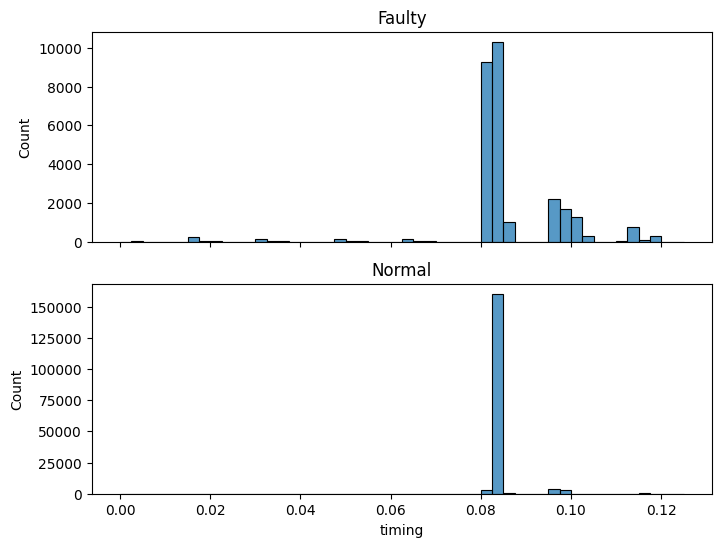

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

%cd $PATH/notebooks

df = data['s']
df = df[df.type != "RESET"]
groups = [g for _, g in df.groupby('type')]

for g in groups:
    print(len(g))

fig, axes = plt.subplots(len(groups), 1, figsize=(8, 3 * len(groups)), sharex=True)
if len(groups) == 1:
    axes = [axes]

for i, group in enumerate(groups):
    sns.histplot(
        ax=axes[i], 
        data=group,
        x='timing',
        bins=50,
        binrange=(0, 0.125)
    )
    titlemap = {'JUSTRIGHT': "Faulty", 'NORMAL': "Normal"}
    title = titlemap[group['type'].unique()[0]]
    axes[i].set_title(title)
plt.savefig("timing-dummy.pdf")

## Execution time profiling

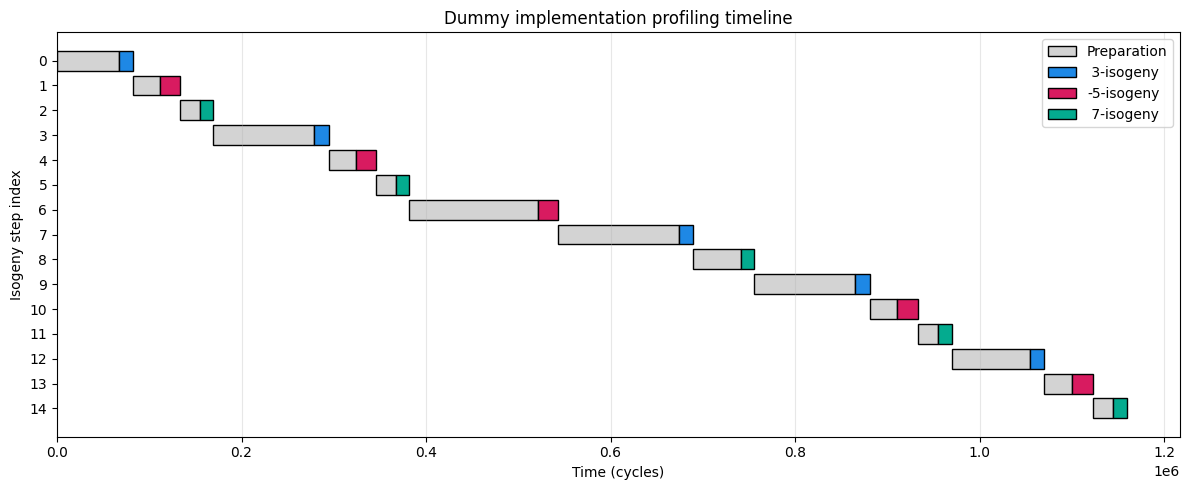

In [10]:
import matplotlib.pyplot as plt
import pandas as pd


hue_order = ["NORMAL", "RESET", "CHANGING", "JUSTRIGHT"]
palette = ["#1E88E5", "#D81B60", "#FFC187", "#04AB8F"]

df = APPROX_EXECUTION_TIME

fig, ax = plt.subplots(figsize=(12, 5))

# color by degree
colors = {3: "#1e88e5", -5: "#d81b60", 7: "#04ab8F"}

for i, row in df.iterrows():
    y = len(df) - i -1  # invert so first row is at top

    # setup interval
    ax.barh(
        y=y,
        width=row["isogeny_start"] - row["setup_start"],
        left=row["setup_start"],
        color="lightgray",
        edgecolor="black",
        label="Preparation" if i == 0 else None
    )

    # isogeny interval
    ax.barh(
        y=y,
        width=row["isogeny_end"] - row["isogeny_start"],
        left=row["isogeny_start"],
        color=colors[row["degree"]],
        edgecolor="black",
        label=f"{row['degree']:2}-isogeny" if f"{row['degree']:2}-isogeny" not in ax.get_legend_handles_labels()[1] else None
    )

# formatting
ax.set_xlabel("Time (cycles)")
ax.set_ylabel("Isogeny step index")
plt.yticks(range(0, len(df)), range(len(df)-1, -1,-1))
# ax.set_yticks(range(len(df), -1,-1))
ax.set_title("Dummy implementation profiling timeline")
ax.legend(loc="upper right")
ax.grid(True, axis="x", alpha=0.3)

plt.tight_layout()
plt.savefig("profiling-dummy.pdf")

## Glitch categorization

In [11]:
df = data['s'].copy()
# df = df[df.type == 'JUSTRIGHT'].copy()

mask = df['response'].isin(DUMMY_ISOGENY_NEIGHBOURS.keys())
df.loc[mask,'expected_degree'] = df.loc[mask, 'response'].apply(lambda x: DUMMY_ISOGENY_NEIGHBOURS[int(x)][1])
df.loc[mask,'expected_degree_str'] = df.loc[mask, 'response'].apply(lambda x: DUMMY_ISOGENY_NEIGHBOURS[int(x)][0])
df.loc[:, 'interval'] = None  # default (no match)
df.loc[:, 'actual_degree'] = None
df.loc[:, 'actual_orientation'] = None


for i, entry in enumerate(APPROX_EXECUTION_TIME.to_dict('records')):
    interval_start = entry['setup_start']
    interval_end = entry['isogeny_end'] if not i == len(APPROX_EXECUTION_TIME) - 1 else APPROX_TOTAL_EXECUTION_TIME 
    actual_degree = entry['degree']

    # Assign interval ID where offset falls in range
    mask = (interval_start < df['ext_offset']) & (df['ext_offset'] < interval_end)
    df.loc[mask, 'interval'] = i
    df.loc[mask, 'actual_degree'] = actual_degree
    df.loc[mask, 'actual_orientation'] = 1 if actual_degree > 0 else -1
    df.loc[mask, 'actual_absolute_degree'] = abs(actual_degree)

    mask = ()

df = df.dropna(subset=['interval'])
len(df), len(df[df.type.isin(['JUSTRIGHT']) & df.expected_degree.notna()])

(449989, 7118)

Distinguishing faulty and real isogeny steps.

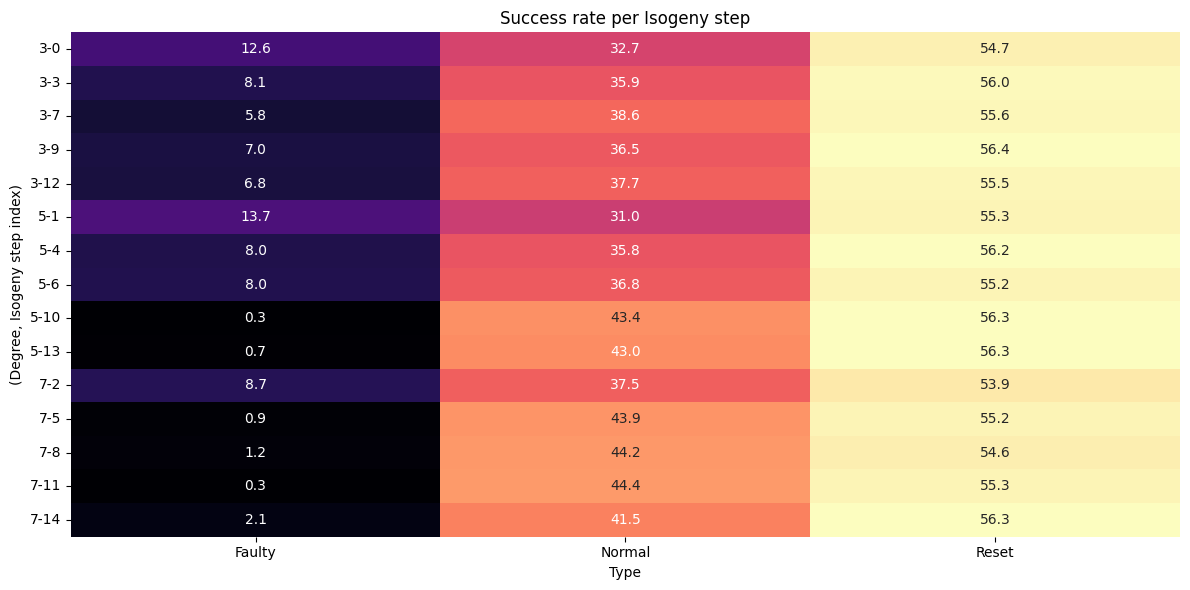

In [12]:
df_copy = df.copy()
df_copy['type'] = df_copy['type'].apply(lambda x: {
    "JUSTRIGHT": "Faulty",
    "NORMAL": "Normal",
    "RESET": "Reset"
}[x])
df_copy['actual_absolute_degree'] = df_copy['actual_absolute_degree'].apply(int)
faulty_rates_per_isogenies = 100 * df_copy.groupby(["actual_absolute_degree","interval", "type"])['unit'].count()/df_copy.groupby(["interval"])['unit'].count()

import seaborn as sns
import matplotlib.pyplot as plt

df_heat = faulty_rates_per_isogenies.unstack("type")

plt.figure(figsize=(12,6))
sns.heatmap(
    df_heat,
    annot=True,
    fmt=".1f",
    cmap="magma",
    cbar=False
)
plt.title("Success rate per Isogeny step")
plt.ylabel("(Degree, Isogeny step index)")
plt.xlabel("Type")
plt.tight_layout()
plt.savefig("success-rate-per-isogeny-index.pdf")

How many faulty outputs were in dummy isogenies ? 

In [13]:
dummy_intervals = [10, 13, 5, 8, 11, 14]
round(100 * len(df[(df.type == 'JUSTRIGHT') & df.interval.isin(dummy_intervals)])/len(df[df.type == 'JUSTRIGHT']), 2)

3.96

How many faulty outputs
- Do we have in total?
- Are not classified?
- Are in distance less than 2 from the expected output curve?
- Are in distance 2?
- Are in distance 1?
- Are skipped (faulty output from +d isogeny is +d away) / flipped

In [14]:
total = df[df.type == 'JUSTRIGHT']
skipped = df[df.expected_degree == df.actual_degree]
flipped = df[(df.expected_degree == df.actual_orientation * df.actual_degree**2)]
d2 = [3**2,5**2,7**2,-3**2,-5**2,-7**2]
d1 = [3,5,7,-3,-5,-7]
distance_1 = total[total.expected_degree.isin(d1)]
distance_2 = total[total.expected_degree.isin(d2)]
unclassified = total[total.expected_degree_str.isna()]
print({
    "Total Faulty": len(total),
    "Unclassified": (len(unclassified), round(100 * len(unclassified)/len(total),2)),
    "Distance == 1": (len(distance_1), round(100 * len(distance_1)/len(total), 2)),
    "Skipped": (len(skipped), round(100 * len(skipped)/len(total))),
    "Distance == 2": (len(distance_2),round(100 * len(distance_2)/len(total),2)),
    "Flipped": (len(flipped), round(100 * len(flipped)/len(total), 2))
})


{'Total Faulty': 28567, 'Unclassified': (21449, 75.08), 'Distance == 1': (3429, 12.0), 'Skipped': (1068, 4), 'Distance == 2': (3689, 12.91), 'Flipped': (1562, 5.47)}


We visualize how the classified glitches relate to the time in which the glitch was inserted

/home/tjaros/csidh-setup/notebooks


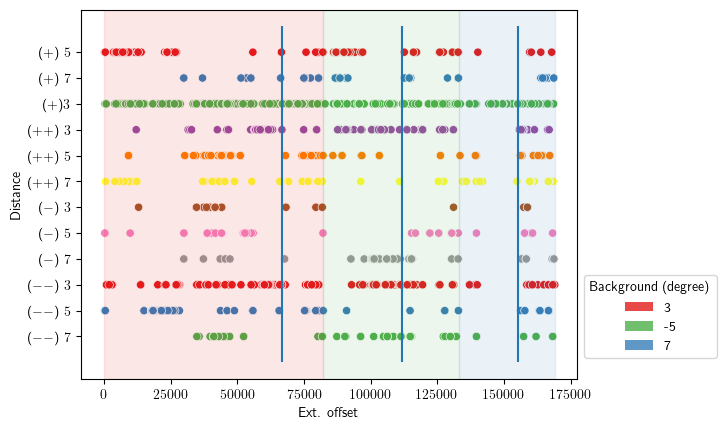

In [15]:
%cd $PATH/notebooks
%run ./figures/single-glitch-isogeny-figure.ipynb
plot_isogeny_offsets(
    df[(df.expected_degree_str != "Unknown") & (df.interval.isin([0,1,2]))],
    APPROX_EXECUTION_TIME,
    output_file="extoffset-vs-distance-dummy.pdf"
)

Which part (preparation/isogeny itself) was most often glitched successfully ? 

In [16]:
import numpy as np
import pandas as pd

merged = df[df.expected_degree_str.notna()]
print(len(merged))
merged = merged.merge(
    APPROX_EXECUTION_TIME[['setup_start', 'isogeny_start', 'isogeny_end']],
    left_on='interval', right_index=True
)
is_setup = merged['ext_offset'] < merged['isogeny_start']
merged['glitched_part'] = np.where(is_setup, 'Preparation', 'Isogeny')
100 * round(merged.groupby('glitched_part')['unit'].count()/len(merged), 2)

7118


glitched_part
Isogeny        16.0
Preparation    84.0
Name: unit, dtype: float64

Do the faulty outputs of unprotected implementation leak the orientation ?

We do this in Attacker model 3 scenario when we assume we know the isogeny steps degrees, then we look at the faulty results which seem to be distance 1 or 2 from the expected output curve.

We do this per all isogeny steps aggregated, and also per individual isogeny step, and we just compare the counts of positive and negative faulty outputs which match our criteria. 

In [17]:
# Optionally filter too close measurements
df = df[df.expected_degree_str.notna()].sort_values("ext_offset").reset_index(drop=True)
threshold = 0
dominance_factor = 1
print(len(df))
keep = [True]
for i in range(1, len(df)):
    if df.loc[i, "ext_offset"] - df.loc[i - 1, "ext_offset"] < threshold:
        keep.append(False)
    else:
        keep.append(True)
df_filtered = df[keep].reset_index(drop=True)
df_filtered = df[~df.interval.isin(dummy_intervals)]
print(len(df_filtered))

7118
6484


In [18]:
# Compare counts of positive and negative measurements
def compare_counts(results, dominance_factor):
    P = results["(+)"] + results["(++)"]
    N = results["(-)"] + results["(--)"]

    if P > dominance_factor * N:
        return +1
    elif N > dominance_factor * P:
        return -1
    else:
        return 0

Overall results aggregated per degree show that the correct degree dominates

In [19]:
correct = 0
dominance_factor = 1
table = []
for d in [3, 5, 7]:
    groups = [df_filtered[df_filtered.actual_absolute_degree == d]] # A3 assumes they know absolute value of degree
    for group in groups:
        results = {
            "(+)": len(group[group.expected_degree == d]),
            "(-)": len(group[group.expected_degree == -d]),
            "(++)": len(group[group.expected_degree == d**2]),
            "(--)": len(group[group.expected_degree == -d**2])
        }
        pattern = compare_counts(results, dominance_factor=dominance_factor)
        if pattern > 0:
            p = '+'
        elif pattern < 0:
            p = '-'
        else:
            p = '?'

        if pattern > 0 and group.iloc[0].actual_degree > 0:
            correct += 1

        if pattern < 0 and group.iloc[0].actual_degree < 0:
            correct += 1

        degree = group.iloc[0].actual_degree
        entry = {
            "Isogeny step": group.iloc[0].interval,
            "Degree": degree,
            "Group size": len(group[group.expected_degree_str.notna()]),
            "Dominating orientation": p,
            "Correct": (pattern > 0 and degree > 0) or (pattern < 0 and degree < 0)
        }
        entry.update(results)
        table.append(entry)

print(f"Correctly guessed orientations: {correct}/3. {threshold}")
table = pd.DataFrame(table)
table

Correctly guessed orientations: 3/3. 0


,Isogeny step,Degree,Group size,Dominating orientation,Correct,(+),(-),(++),(--)
0,0,3,4412,+,True,1008,193,1203,423
1,1,-5,1879,-,True,149,44,55,285
2,2,7,193,+,True,7,11,21,7


Results agregated per degree and individual isogeny steps are less reliable since there seem to be less of the glitches that hit certain isogeny steps when glitching at random 

In [20]:
print(table.to_latex(index=False))

\begin{tabular}{rrrlrrrrr}
\toprule
Isogeny step & Degree & Group size & Dominating orientation & Correct & (+) & (-) & (++) & (--) \\
\midrule
0 & 3 & 4412 & + & True & 1008 & 193 & 1203 & 423 \\
1 & -5 & 1879 & - & True & 149 & 44 & 55 & 285 \\
2 & 7 & 193 & + & True & 7 & 11 & 21 & 7 \\
\bottomrule
\end{tabular}



In [21]:
correct = 0
dominance_factor = 1
table = []
for d in [3, 5, 7]:
    groups = [g for _, g in df_filtered[df_filtered.actual_absolute_degree == d].groupby('interval')] # A3 assumes they know absolute value of degree
    for group in groups:
        results = {
            "(+)": len(group[group.expected_degree == d]),
            "(++)": len(group[group.expected_degree == d**2]),
            "(-)": len(group[group.expected_degree == -d]),
            "(--)": len(group[group.expected_degree == -d**2])
        }
        pattern = compare_counts(results, dominance_factor=dominance_factor)
        if pattern > 0:
            p = '+'
        elif pattern < 0:
            p = '-'
        else:
            p = '?'

        if pattern > 0 and group.iloc[0].actual_degree > 0:
            correct += 1

        if pattern < 0 and group.iloc[0].actual_degree < 0:
            correct += 1

        degree = group.iloc[0].actual_degree
        entry = {
            "Isogeny step": group.iloc[0].interval,
            "Degree": degree,
            "Group size": len(group[group.expected_degree_str.notna()]),
            "Dominating orientation": f"${p}$",
            "Correct": "\\cmark" if (pattern > 0 and degree > 0) or (pattern < 0 and degree < 0) else "-"
        }
        entry.update(results)
        table.append(entry)
print(f"Correctly guessed orientations: {correct}/9.")
table = pd.DataFrame(table)
table

Correctly guessed orientations: 7/9.


,Isogeny step,Degree,Group size,Dominating orientation,Correct,(+),(++),(-),(--)
0,0,3,1020,$+$,\cmark,248,38,22,168
1,3,3,863,$+$,\cmark,212,141,8,59
2,7,3,983,$+$,\cmark,159,295,63,194
3,9,3,1092,$+$,\cmark,178,565,99,1
4,12,3,454,$+$,\cmark,211,164,1,1
5,1,-5,441,$+$,-,68,26,19,9
6,4,-5,259,$+$,-,40,18,2,9
7,6,-5,1179,$-$,\cmark,41,11,23,267
8,2,7,193,$+$,\cmark,7,21,11,7


In [22]:
print(table.to_latex(index=False))

\begin{tabular}{rrrllrrrr}
\toprule
Isogeny step & Degree & Group size & Dominating orientation & Correct & (+) & (++) & (-) & (--) \\
\midrule
0 & 3 & 1020 & $+$ & \cmark & 248 & 38 & 22 & 168 \\
3 & 3 & 863 & $+$ & \cmark & 212 & 141 & 8 & 59 \\
7 & 3 & 983 & $+$ & \cmark & 159 & 295 & 63 & 194 \\
9 & 3 & 1092 & $+$ & \cmark & 178 & 565 & 99 & 1 \\
12 & 3 & 454 & $+$ & \cmark & 211 & 164 & 1 & 1 \\
1 & -5 & 441 & $+$ & - & 68 & 26 & 19 & 9 \\
4 & -5 & 259 & $+$ & - & 40 & 18 & 2 & 9 \\
6 & -5 & 1179 & $-$ & \cmark & 41 & 11 & 23 & 267 \\
2 & 7 & 193 & $+$ & \cmark & 7 & 21 & 11 & 7 \\
\bottomrule
\end{tabular}

